# Hotel Dataset

In [2]:
# Agregar las dependencias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from datetime import date
from sklearn import preprocessing
%matplotlib inline

# Preprocessing

In [3]:
filename = '/Users/diegocerda/Documents/Personal/Interview_Challenges/Garza_Hotel/Examen_DS.csv'
df = pd.read_csv(filename) 
df['Reservación.Fecha'] = pd.to_datetime(df['Reservación.Fecha'])
df['Noches.Fecha'] = pd.to_datetime(df['Noches.Fecha'])
df['Noches'] =  pd.to_numeric(df['Noches'])
df['Reservación.Fecha'] = pd.to_datetime(df['Reservación.Fecha'])
df['CalendarioCancelaciones.FechaCancelacion'] = df['CalendarioCancelaciones.FechaCancelacion'].replace('-', np.nan)
df['CalendarioCancelaciones.FechaCancelacion'] = pd.to_datetime(df['CalendarioCancelaciones.FechaCancelacion'])
df = df.drop_duplicates()
print ('Dataset shape: {}'.format(df.shape))
df.head()

Dataset shape: (34030, 12)


,Resort,Reservaciones.numconfirmacion,Reservación.Fecha,Noches.Fecha,SegmentoHO,Status Reservación,CalendarioCancelaciones.FechaCancelacion,Split,Plan,Noches,Ingreso USD,Id Habitación
0,X,30772,2015-09-22,2016-01-07,E-Marketing,CANCELADA,2015-10-26,0,All Inclusive,1,464.820348,1
1,X,31515,2015-10-21,2016-01-07,Mayoristas Tradicionales,CANCELADA,2016-10-02,0,All Inclusive,1,566.698320,1
2,X,33399,2016-07-01,2016-01-07,E-Marketing,CHECK OUT,NaT,0,All Inclusive,1,320.673183,1
3,X,33564,2016-11-01,2016-01-07,Mayoristas Tradicionales,CHECK OUT,NaT,0,All Inclusive,1,293.349415,1
4,X,33565,2016-11-01,2016-01-07,Mayoristas Tradicionales,CHECK OUT,NaT,-1,All Inclusive,2,494.503853,2


***
# I.
## ¿Cuál es la estancia promedio por hotel de cada segmento?

In [35]:
pd.DataFrame(df.groupby(['Resort', 'SegmentoHO'])['Noches'].mean())

Noches
Resort SegmentoHO                        
X      Bodas Extranjeras         0.897959
       Comercio Electronico Nal  0.989091
       Directos Extranjeros      0.974026
       Directos Nacionales       1.000000
       E-Commerce International  0.996650
       E-Marketing               1.030449
       Grupos Extranjeros        1.000000
       Grupos Nacionales         1.000000
       Mayoristas Nacionales     0.957983
       Mayoristas Tradicionales  1.020060
       Otros                     1.000000
       Preferred Hotels          1.000000
       Private Sales             0.956522
Y      Comercio Electronico Nal  0.985507
       Directos Extranjeros      1.000000
       Directos Nacionales       1.000000
       E-Commerce International  0.989087
       E-Marketing               0.988707
       Grupos Extranjeros        1.000000
       Mayoristas Nacionales     0.937500
       Mayoristas Tradicionales  0.997059
       Otros                     1.000000
       Preferred Hotels          0.956522
       Private Sales             0.995708
Z      Bodas Extranjeras         1.015385
       Bodas Nacionales          1.000000
       Comercio Electronico Nal  1.075000
       Directos Extranjeros      0.928571
       Directos Nacionales       1.000000
       E-Commerce International  1.188516
       E-Marketing               1.230796
       Grupos Extranjeros        1.000000
       Mayoristas Nacionales     1.960000
       Mayoristas Tradicionales  1.172349
       Otros                     1.052288
       Private Sales             0.988930

Basandonos en la columna de `Noches` ese seria el promedio, pero note que en algunos casos una misma reservacion se repite muchas veces, ejemplo:

In [121]:
df[(df['Reservaciones.numconfirmacion'] == 184741)] # ejemplo.

,Resort,Reservaciones.numconfirmacion,Reservación.Fecha,Noches.Fecha,SegmentoHO,Status Reservación,CalendarioCancelaciones.FechaCancelacion,Split,Plan,Noches,Ingreso USD,Id Habitación
34113,Z,184741,2018-09-24,2019-07-24,Mayoristas Tradicionales,ACTIVA,NaT,-1,All Inclusive,2,357.1275,16
34117,Z,184741,2018-09-24,2019-07-25,Mayoristas Tradicionales,ACTIVA,NaT,-1,All Inclusive,2,357.1275,16
34120,Z,184741,2018-09-24,2019-07-26,Mayoristas Tradicionales,ACTIVA,NaT,-1,All Inclusive,2,357.1275,16
34123,Z,184741,2018-09-24,2019-07-27,Mayoristas Tradicionales,ACTIVA,NaT,-1,All Inclusive,2,357.1275,16
34126,Z,184741,2018-09-24,2019-07-28,Mayoristas Tradicionales,ACTIVA,NaT,-1,All Inclusive,2,357.1275,16
34129,Z,184741,2018-09-24,2019-07-29,Mayoristas Tradicionales,ACTIVA,NaT,-1,All Inclusive,2,357.1275,16
34132,Z,184741,2018-09-24,2019-07-30,Mayoristas Tradicionales,ACTIVA,NaT,-1,All Inclusive,2,357.1275,16


A pesar de que la columna de `Noches` dice que fueron `2`, en realidad las noches fueron `7`, de 2019-07-24 a 2019-07-30 por lo tanto todo depende de como interpretemos la pregunta.

***
# II.
## De la BD construye un pronóstico de noches activas y las noches canceladas para Julio 2019, usando cualquier metodo.

***

# Noches Activas Julio 2019

In [273]:
# Incluimos los estados validos y limitamos a la fecha actual.
activas = df[(df['Status Reservación'] == 'ACTIVA') | (df['Status Reservación'] == 'CHECK OUT') 
             | (df['Status Reservación'] == 'CHECK IN')] 
lista_activas = activas['Noches.Fecha'].value_counts().sort_index()

Text(0.5,0,'Fecha')

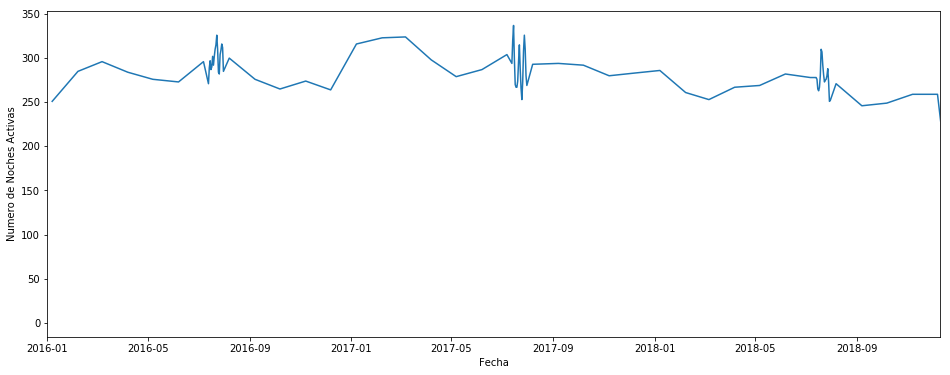

In [356]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(lista_activas.index, lista_activas)
plt.xlim([ '2016' , '2018-12-10'])
plt.ylabel('Numero de Noches Activas')
plt.xlabel('Fecha')

In [310]:
df_fb = lista_activas.reset_index()
df_fb.columns = ['ds', 'y']

train_window_fb = df_fb[(df_fb['ds'] > '2016') & (df_fb['ds'] < '2019')]
test_window_fb = df_fb[(df_fb['ds'] > '2019') ]
future = test_window_fb.drop(columns='y')

from fbprophet import Prophet
m = Prophet()
m.fit(train_window_fb)
forecast = m.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


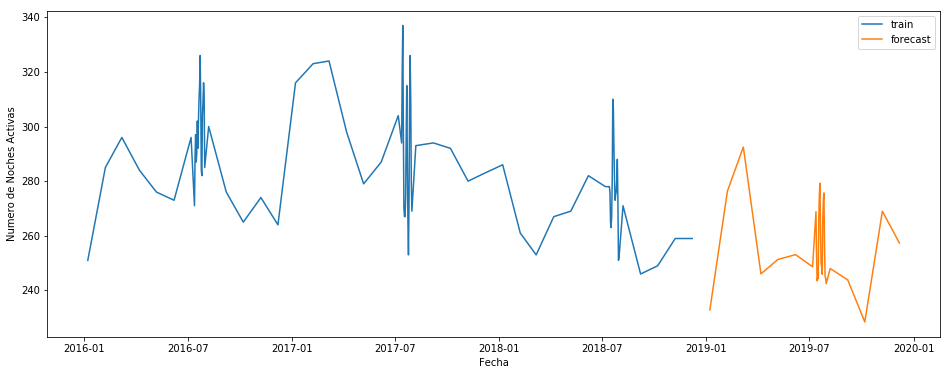

In [320]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.plot(train_window_fb.set_index('ds')['y'], label = 'train')
#plt.plot(test_window_fb.set_index('ds')['y'], label = 'test')
plt.plot(forecast.set_index('ds')['yhat'], label = 'forecast')
plt.ylabel('Numero de Noches Activas')
plt.xlabel('Fecha')
plt.legend()

In [369]:
Julio = round(final_fb_forecast.loc['2019-07'].sum() / len(final_fb_forecast.loc['2019-07']))
print ("En promedio se esperan: {} en el Mes de Julio 2019".format(Julio))

En promedio se esperan: 257.0 en el Mes de Julio 2019


***
# Noches Canceladas Julio 2019

Filtramos todas las reservaciones con status `CANCELADA` y contamos el numero de occurencias por dia. Tambien quitamos todos los duplicados basados en el numero de confirmacion.

In [3]:
only_one_confrimation = df[df['Status Reservación'] == 'CANCELADA'].drop_duplicates(subset='Reservaciones.numconfirmacion')
listas_canceladas = only_one_confrimation['CalendarioCancelaciones.FechaCancelacion'].value_counts().sort_index()
listas_canceladas.head()

2015-05-09    1
2015-08-12    2
2015-09-11    1
2015-10-26    1
2015-11-14    1
Name: CalendarioCancelaciones.FechaCancelacion, dtype: int64

Text(0.5,0,'Fecha')

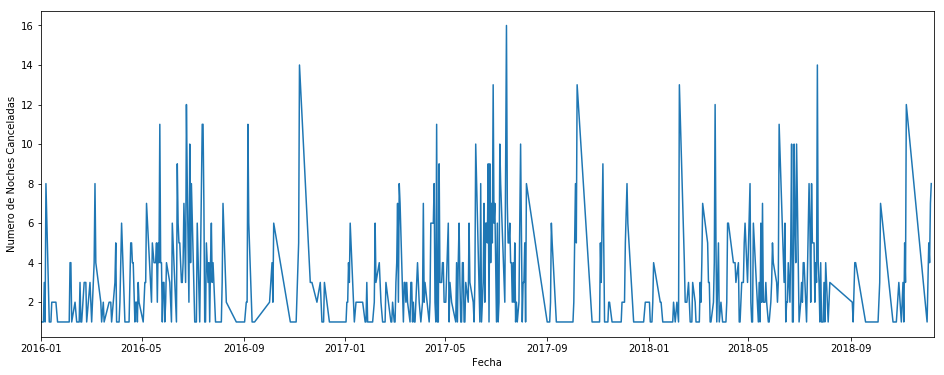

In [4]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(listas_canceladas.index, listas_canceladas)
plt.xlim([ '2016' , '2018-12-10'])
plt.ylabel('Numero de Noches Canceladas')
plt.xlabel('Fecha')

A continuacion generamos los "features" para alimentar nuestro modelo y de esta manera hacer la predicion. Cabe destacar que la seleccion de los "features" por si mismo es un problema complejo y de ellos depende el rendimiento del modelo, por ejemplo, pudieramos contar los dias festivos, la hora en la que se hizo la reservacion, datos demograficos de la persona que hace la reservacion, etc. Para nuestro caso particular solo elegimos el dia y el mes para entrenar el modelo.

In [49]:
# feature extraction
data = pd.DataFrame()
data['fecha'] = pd.to_datetime(listas_canceladas.index)
data["fecha"] = pd.to_datetime(data["fecha"])
data['X1'] = data['fecha'].dt.month
data['X2'] = data['fecha'].dt.day
data['Y1'] = listas_canceladas.values

In [5]:
from sklearn.svm import SVR # support vector regressor
y = np.array(data['Y1'].values)
X = np.array(data[['X1','X2']].values)
clf = SVR() # valores predeterminados, idealmente necesitariamos hacer tunning.
clf.fit(X, y) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
# creamos los valores a predecir
pred = pd.DataFrame()
pred['fecha'] = pd.date_range(start='1/1/2019', periods=365) # un anio
pred["fecha"] = pd.to_datetime(pred["fecha"])
pred['X1'] = pred['fecha'].dt.month
pred['X2'] = pred['fecha'].dt.day
X_hat = np.array(pred[['X1','X2']].values)
pred['Y1'] = clf.predict(X_hat) # hacer la prediccion
pred = pred.round()

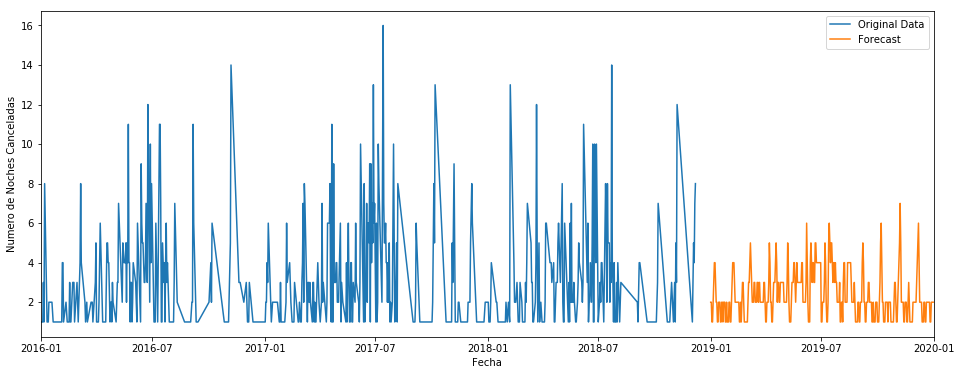

In [53]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(data['fecha'], data['Y1'], label='Original Data')
plt.plot(pred['fecha'], pred['Y1'], label='Forecast')
plt.ylabel('Numero de Noches Canceladas')
plt.xlabel('Fecha')
plt.xlim([ '2016' , '2020'])
plt.legend()

In [29]:
pred.index = pred['fecha']
data.index = data['fecha']

print "En Julio de 2019 se predicen {} cancelaciones".format(pred.loc['2019-07']['Y1'].sum())
print "En Julio de 2018 se presentaron {} cancelaciones".format(data.loc['2018-07']['Y1'].sum())
print "En Julio de 2017 se presentaron {} cancelaciones".format(data.loc['2017-07']['Y1'].sum())
print "En Julio de 2016 se presentaron {} cancelaciones".format(data.loc['2016-07']['Y1'].sum())

En Julio de 2019 se predicen 95.0 cancelaciones
En Julio de 2018 se presentaron 96 cancelaciones
En Julio de 2017 se presentaron 115 cancelaciones
En Julio de 2016 se presentaron 77 cancelaciones


Se puede observar que la prediccion sigue el mismo patron que los anios anteriores. Se predice algo similar al ano pasado. En este caso se utilizo un modelo de aprendizaje automatico (SVR). Usualmente se deberia crear 3 sets para poder evaluar el modelo pero quise utilizar todos los datos para entrenar al modelo por simplicidad.

***
# III. 
## ¿Cuál es la correlación entre las noches producidas y la tarifa? (Toma en cuenta la fecha de reservación)

Obtener el numero de noches que se compraron y el total de ingresos por confirmacion.

In [4]:
ingreso_total = df.groupby(['Reservaciones.numconfirmacion']).sum() # indice es la reservacion
ingreso_total.head(2) # ejemplo

,Split,Noches,Ingreso USD,Id Habitación
Reservaciones.numconfirmacion,,,,
1853,0,4,1899.783852,36
1992,0,3,1063.908522,27


Calcular cuantos dias transcurrieron de la fecha de reservacion a la fecha de llegada. Para esto agrupamos por confirmacion y obtenemos la primera columna de una lista ordenada para saber cuando llegaron.

In [5]:
ordenado = df.sort_values('Noches.Fecha')
fecha_llegada = ordenado[~ordenado.duplicated(subset='Reservaciones.numconfirmacion')]
fecha_llegada.set_index('Reservaciones.numconfirmacion', inplace=True) # Index para despues hacer el join
final = pd.merge(fecha_llegada[['Reservación.Fecha','Noches.Fecha']], ingreso_total, left_index=True, right_index=True)
final.head()

,Reservación.Fecha,Noches.Fecha,Split,Noches,Ingreso USD,Id Habitación
Reservaciones.numconfirmacion,,,,,,
30772,2015-09-22,2016-01-07,0,2,929.640696,2
114461,2016-04-29,2016-01-07,0,3,388.790013,54
114456,2016-04-29,2016-01-07,0,6,1668.861449,96
114448,2016-04-29,2016-01-07,-8,16,2233.300487,128
114374,2016-04-28,2016-01-07,0,2,471.862427,42


In [6]:
final['dias_anticipacion'] =  abs(final['Noches.Fecha'] -  final['Reservación.Fecha']) # calcular la diferencia.
final['dias_anticipacion'] = final['dias_anticipacion'].dt.days # convertir a numerico.
final['precio_noche'] = final['Ingreso USD'] / final['Noches'] # calcular el precio por noche.
corr_final = final[['precio_noche','dias_anticipacion','Ingreso USD','Noches']] # seleccionar los campos de interes.

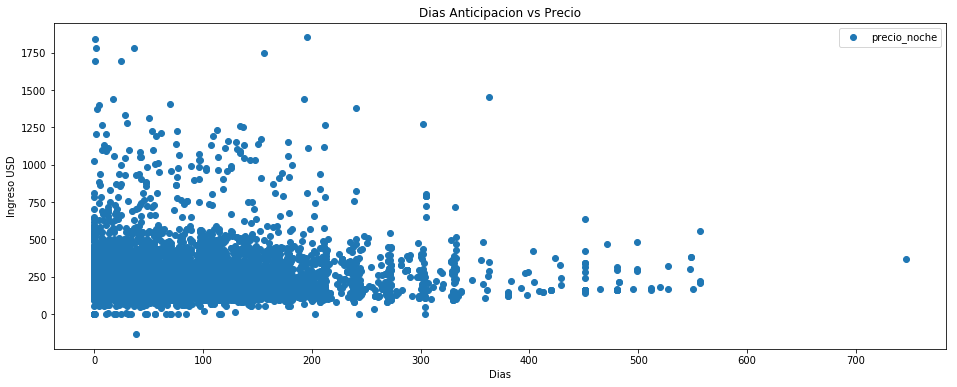

In [7]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.title("Dias Anticipacion vs Precio")
plt.ylabel('Ingreso USD')
plt.xlabel('Dias')
plt.scatter(corr_final['dias_anticipacion'], corr_final['precio_noche'])
plt.legend()

De lo anterior podemos concluir que al reservar con una anticipacion aproximadamente de 200 dias la tarifa por noche se mantiene baja. En contraste, menores a 100 dias podemos ver una alza en los precios por habitacion con mas frequencia. Sin embargo, para un analisis mas completo se tendria que incluir varios factores como: tipo de habitacion, segmento, etc.

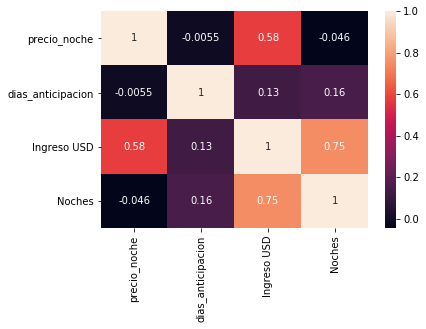

In [10]:
sns.heatmap(corr_final.corr(method='spearman'), annot=True)

In [23]:
corr_final[['Ingreso USD','Noches']].corr(method='spearman')

,Ingreso USD,Noches
Ingreso USD,1.00000,0.75085
Noches,0.75085,1.00000


In [16]:
corr_final['Ingreso USD'].kurtosis()

26.85342817229861

In [14]:
corr_final['Noches'].kurtosis()

11.627697795086272

In [12]:
corr_final['Noches'].skew()

2.170660979302771

In [17]:
corr_final['Ingreso USD'].skew()

3.6044530350586776

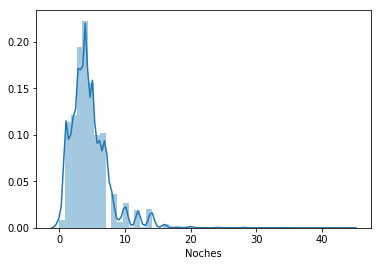

In [20]:
sns.distplot(corr_final['Noches'])
#sns.distplot(corr_final['Ingreso USD'])

***
# IV. 
# ¿Qué otros hallazgos puedes obtener con la BD proporcionada? (Representalos graficamente)

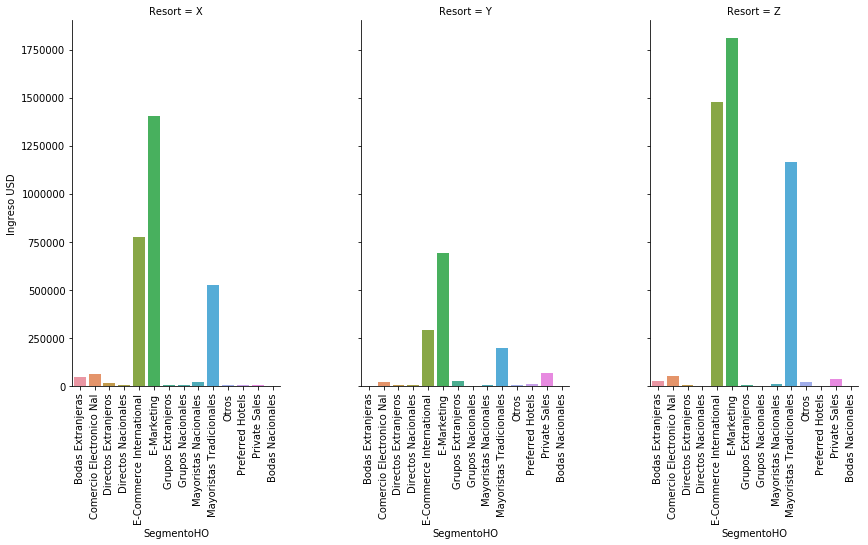

In [116]:
ingreso_sector = pd.DataFrame(df.groupby(['Resort', 'SegmentoHO'])['Ingreso USD'].sum()).reset_index()
g = sns.catplot(x="SegmentoHO", y="Ingreso USD", col="Resort", data=ingreso_sector, kind="bar",  height=6, aspect=.7)
g.set_xticklabels(rotation=90)

De la grafica anterior pordemos notar que el resort  `Y` es el mas barato de los tres y que el resort `Z`  es el de mayor precio o el que genera mas ingresos. El sector que genera mayores ingresos en los tres resorts es el de `E-Marketing` seguido por `E-Commerce International`.
***

Text(0.5,0,u'Id Habitaci\xf3n')

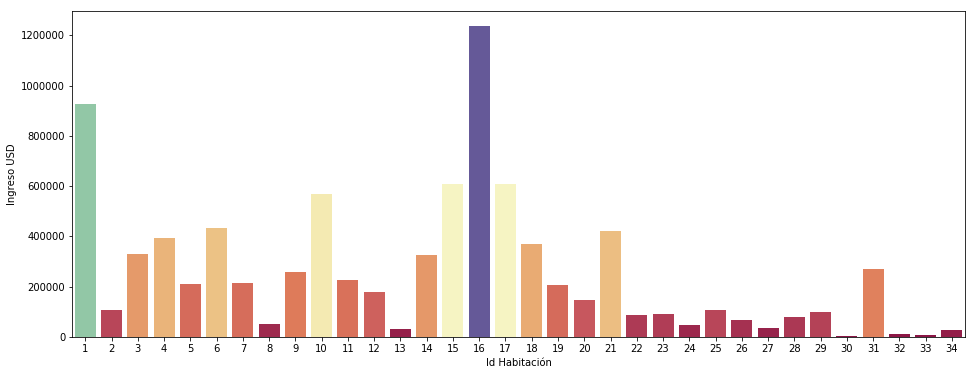

In [48]:
ingreso_habitacion = pd.DataFrame(df.groupby(['Id Habitación'])['Ingreso USD'].sum().reset_index())
fig, ax = plt.subplots(figsize=(16, 6))
norm = plt.Normalize(ingreso_habitacion['Ingreso USD'].min(), ingreso_habitacion['Ingreso USD'].max())
colors = plt.cm.Spectral(norm(ingreso_habitacion['Ingreso USD'].values))
ax = sns.barplot("Id Habitación", y="Ingreso USD", data=ingreso_habitacion, palette=colors)
ax.set_xlabel(u"Id Habitación")


In [54]:
pd.DataFrame(df[df['Id Habitación'] == 16].groupby(['SegmentoHO'])['Resort'].count()) # Habitacion 16

,Resort
SegmentoHO,
Bodas Extranjeras,7
E-Commerce International,1083
E-Marketing,1090
Mayoristas Nacionales,18
Mayoristas Tradicionales,1024
Otros,4


In [55]:
pd.DataFrame(df[df['Id Habitación'] == 30].groupby(['SegmentoHO'])['Resort'].count()) # Habitacion 30

,Resort
SegmentoHO,
E-Marketing,4


De la grafica anterior podemos notar que la habitacion numero `16` tiene la mayor cantidad de ingresos, lo cual tiene sentido porque es parte del Resort `Z`  y ha sido utilizada principalmente por el sector de `E-Marketing` por consecuencia es la que genera mas ingresos seguida de la habitacion numero `1`. En contraste, la habitacion numero `30` es la que menor ingresos genera dado que solo ha sido utilizada por 4 noches.
***

In [28]:
pd.DataFrame(df.groupby(['Plan'])['Ingreso USD'].sum())  # Total de Ingreso por Plan

,Ingreso USD
Plan,
-,7.260912e+03
All Inclusive,5.674739e+06
European Plan,3.102837e+06


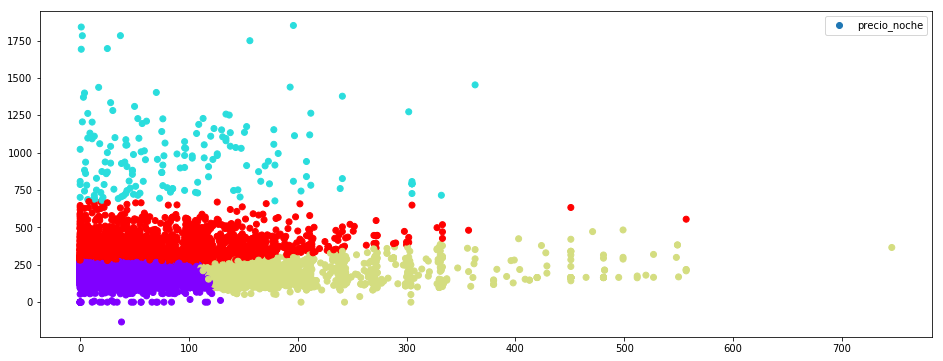

In [88]:
#@title Clustering
from sklearn.cluster import KMeans
df_km = corr_final[['dias_anticipacion', 'precio_noche']]
df_km = df_km.replace([np.inf, -np.inf], np.nan).dropna()
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_km)
fig, ax = plt.subplots(figsize=(16, 6))
plt.scatter(df_km['dias_anticipacion'], df_km['precio_noche'], c=kmeans.labels_, cmap='rainbow')
plt.legend()

Tambien podriamos usar algun metodo de clustering para poder identificar segmentos de mercado. Utilizando el resultado del ejercicio anterior podemos identificar 4 Segmentos. Por ejemplo, en la esquina inferior izquierda podemos notar un pequeno segmento (morado), la interpretacion pudiera ser que usualmente los usuarios que generan pocos ingresos reservan con poca anticipacion.

Aunque el problema parezca sencillo en realidad hay muchas validaciones y casos especiales que hay que tomarse en cuenta. En lo personal gran parte del tiempo me la pase tratando de darle alguna interpretacion a los datos pero al final del dia siempre es importante preguntar al cliente/experto que es lo que realmente se busca y ver si tiene sentido. Por ejemplo, casos como el siguiente se me hicieron dificiles de comprender y como persona externa al proceso a veces no tiene mucho sentido. Me econtre con el caso donde una misma reservacion con la misma fecha existe en el sistema con dos precios diferentes para el mismo dia.

In [143]:
df.loc[[8397,8398,8399]]

,Resort,Reservaciones.numconfirmacion,Reservación.Fecha,Noches.Fecha,SegmentoHO,Status Reservación,CalendarioCancelaciones.FechaCancelacion,Split,Plan,Noches,Ingreso USD,Id Habitación
8397,Z,106981,2016-03-02,2016-07-24,Bodas Extranjeras,CHECK OUT,NaT,0,All Inclusive,0,-219.930644,17
8398,Z,106981,2016-03-02,2016-07-24,Bodas Extranjeras,CHECK OUT,NaT,0,All Inclusive,0,152.755708,17
8399,Z,106981,2016-03-02,2016-07-24,Bodas Extranjeras,CHECK OUT,NaT,0,All Inclusive,0,-455.380584,17
